
# 📍 Dashboard 8: Ventas por Sucursal

Este análisis busca comparar el desempeño de distintas sucursales del restaurante en un periodo de 6 meses. Se estudian KPIs por sucursal, evolución de ventas y distribución porcentual.


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo_excel = "/content/Datos_Restaurante_Ejemplo_6meses.xlsx"
xls = pd.ExcelFile(archivo_excel)

ventas = xls.parse('Ventas')
sucursales = xls.parse('Sucursales')
ventas['fecha'] = pd.to_datetime(ventas['fecha'])
ventas['mes'] = ventas['fecha'].dt.month

ventas_sucursal = ventas.groupby(['id_sucursal', 'mes'])['total'].sum().reset_index()
ventas_sucursal = ventas_sucursal.merge(sucursales, on='id_sucursal')


Sucursal con más ventas: Sucursal Escalón - $10,127.95


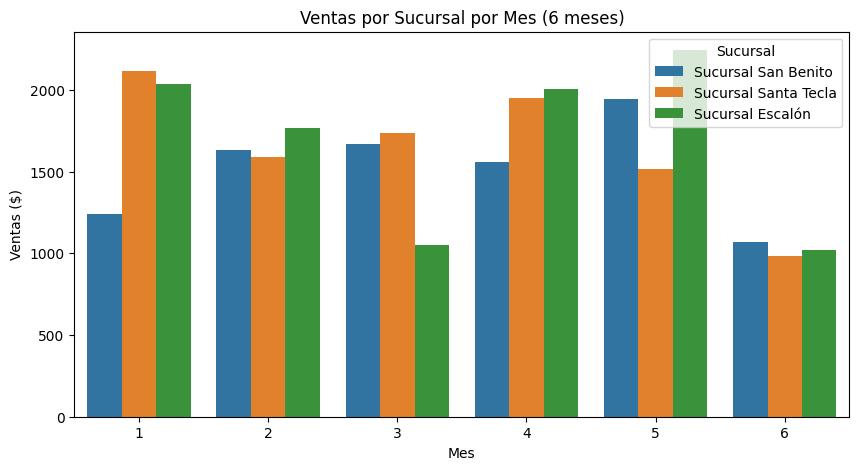

In [4]:

# Total por sucursal
total_sucursal = ventas.groupby('id_sucursal')['total'].sum().reset_index()
total_sucursal = total_sucursal.merge(sucursales, on='id_sucursal')

top = total_sucursal.sort_values('total', ascending=False).iloc[0]
print(f"Sucursal con más ventas: {top['nombre_sucursal']} - ${top['total']:,.2f}")


# Gráfico de barras por sucursal y mes
plt.figure(figsize=(10,5))
sns.barplot(data=ventas_sucursal, x='mes', y='total', hue='nombre_sucursal')
plt.title("Ventas por Sucursal por Mes (6 meses)")
plt.xlabel("Mes")
plt.ylabel("Ventas ($)")
plt.legend(title="Sucursal")
plt.show()


In [5]:
ventas_totales_sucursal = ventas.groupby('id_sucursal')['total'].sum().reset_index()
ventas_totales_sucursal = ventas_totales_sucursal.merge(sucursales, on='id_sucursal')

print("Ventas totales por sucursal:")
display(ventas_totales_sucursal[['id_sucursal', 'total']])


Ventas totales por sucursal:


,id_sucursal,total
0,1,9127.05
1,2,9899.45
2,3,10127.95


In [6]:
mejor = ventas_totales_sucursal.sort_values('total', ascending=False).iloc[0]
print(f"Sucursal con mejor rendimiento: {mejor['nombre_sucursal']} - ${mejor['total']:,.2f}")


Sucursal con mejor rendimiento: Sucursal Escalón - $10,127.95


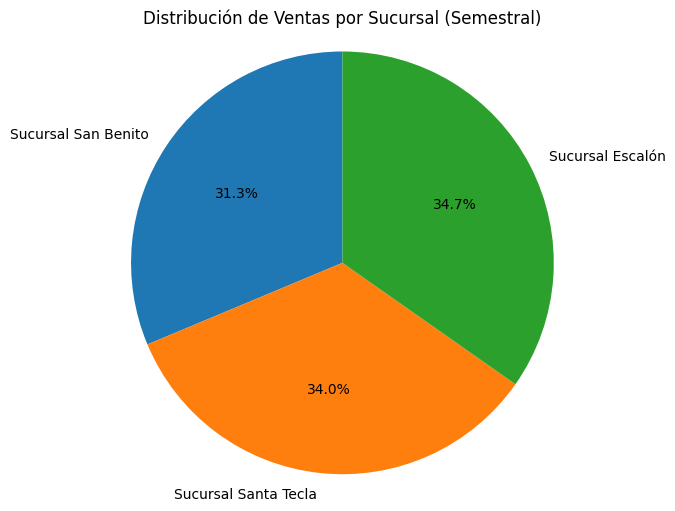

In [7]:
plt.figure(figsize=(6,6))
plt.pie(ventas_totales_sucursal['total'], labels=ventas_totales_sucursal['nombre_sucursal'], autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Ventas por Sucursal (Semestral)")
plt.axis('equal')
plt.show()


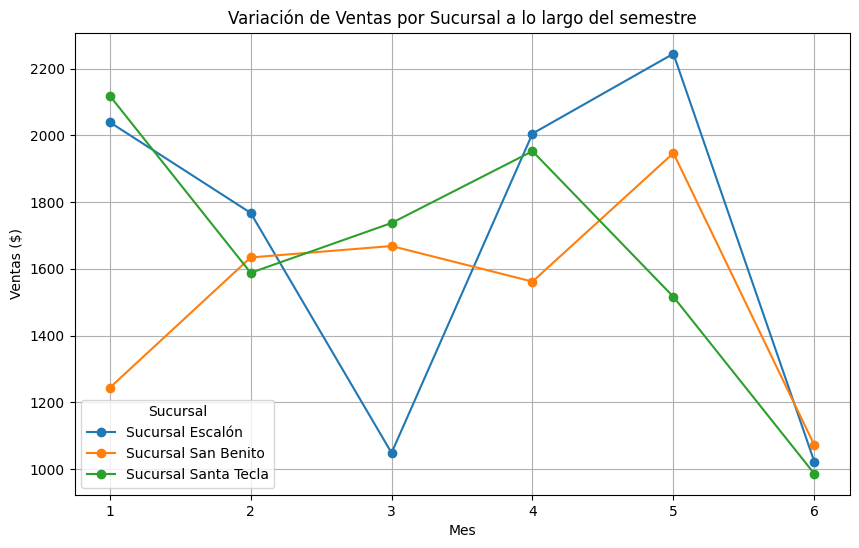

In [8]:
plt.figure(figsize=(10,6))
for nombre, grupo in ventas_sucursal.groupby('nombre_sucursal'):
    plt.plot(grupo['mes'], grupo['total'], marker='o', label=nombre)

plt.title("Variación de Ventas por Sucursal a lo largo del semestre")
plt.xlabel("Mes")
plt.ylabel("Ventas ($)")
plt.legend(title="Sucursal")
plt.grid(True)
plt.xticks(range(1, 7))
plt.show()


In [9]:
peor = ventas_totales_sucursal.sort_values('total').iloc[0]
print(f"Sucursal más deficiente frente a meta: {peor['nombre_sucursal']} - ${peor['total']:,.2f}")


Sucursal más deficiente frente a meta: Sucursal San Benito - $9,127.05
